In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import sys
import os
import re
import pysam
import glob
from Bio.Seq import Seq
import pyranges as pr
from rapidfuzz import fuzz
import mappy as mp
import matplotlib.pyplot as plt
import seaborn as sns

# AS Reports

In [2]:
dpath = "/nfs/turbo/umms-indikar/shared/projects/HSC/data/adaptive_sampling/experiment_data/"

df = []
for test_run in os.listdir(dpath):
    print(test_run)
    search = f"{dpath}{test_run}/other_reports/*adaptive_sampling*"
    search_result = glob.glob(search)

    if not len(search_result) == 1:
        continue
        
    fpath = search_result[0]
    tmp = pd.read_csv(fpath)
    tmp['run'] = test_run
    df.append(tmp)

df = pd.concat(df)
df['is_unblock'] = df['decision'] == 'unblock'
df['is_stop_recieving'] = df['decision'] == 'stop_receiving'
df.head()

2024-04-26-iHSC-AS-6th-Run
fifth_AS_test_03142024
first_AS_test_03122024
sixth_AS_test_03142024
2024-04-26-iHSC-AS-7th-Run
second_AS_test_03132024
seventh_AS_03152024
second_iHSC_AS_04162024
2024-04-26-iHSC-AS-8th-Run-fast
fourth_AS_test_03142024
third_AS_test_03142024
first_iHSC_AS_04152024
2024-04-22-iHSC-4th-run
2024-05-03-iHSC-AS-9th-run
2024-04-18-iHSC-3rd-run


,batch_time,read_number,channel,num_samples,read_id,sequence_length,decision,run,is_unblock,is_stop_recieving
0,1.714144e+09,66,50,2409,1c3ed62d-34a4-4ff7-bc9c-8d70dc7f9c7c,221,unblock,2024-04-26-iHSC-AS-6th-Run,True,False
1,1.714144e+09,83,27,2413,3e33065a-1f21-40d3-95b9-cef46443d87d,249,unblock,2024-04-26-iHSC-AS-6th-Run,True,False
2,1.714144e+09,57,48,2404,33bd2ea9-d97e-4370-8885-27f0df165477,228,unblock,2024-04-26-iHSC-AS-6th-Run,True,False
3,1.714144e+09,75,32,2412,96890e2d-0a78-449f-b179-0a02fae92349,225,unblock,2024-04-26-iHSC-AS-6th-Run,True,False
4,1.714144e+09,75,11,2430,11c31710-850b-4288-8a81-48052aa53d47,202,stop_receiving,2024-04-26-iHSC-AS-6th-Run,False,True


In [3]:
gx = df.groupby('run').agg(
    total_records = ('read_id', 'nunique'),
    unblock_records = ('is_unblock', 'sum'),
    stop_recieving_records = ('is_stop_recieving', 'sum'),
).reset_index()

gx['is_stop_recieving_percent'] = (gx['stop_recieving_records'] / gx['total_records']) * 100
gx['is_unblock_percent'] = (gx['unblock_records'] / gx['total_records']) * 100

gx

,run,total_records,unblock_records,stop_recieving_records,is_stop_recieving_percent,is_unblock_percent
0,2024-04-18-iHSC-3rd-run,1324537,927229,276452,20.871595,70.004009
1,2024-04-22-iHSC-4th-run,2104296,1473403,409821,19.475445,70.018809
2,2024-04-26-iHSC-AS-6th-Run,1860423,1327328,328023,17.631635,71.345495
3,2024-04-26-iHSC-AS-7th-Run,126653,92057,21312,16.827079,72.684421
4,2024-04-26-iHSC-AS-8th-Run-fast,887416,640667,150708,16.982790,72.194664
5,2024-05-03-iHSC-AS-9th-run,1732324,1189775,271783,15.688924,68.680859
6,fifth_AS_test_03142024,54841,54604,237,0.432158,99.567842
7,first_AS_test_03122024,46730,46561,169,0.361652,99.638348
8,second_AS_test_03132024,66026,65820,206,0.311998,99.688002
9,second_iHSC_AS_04162024,895377,534076,262510,29.318377,59.648171


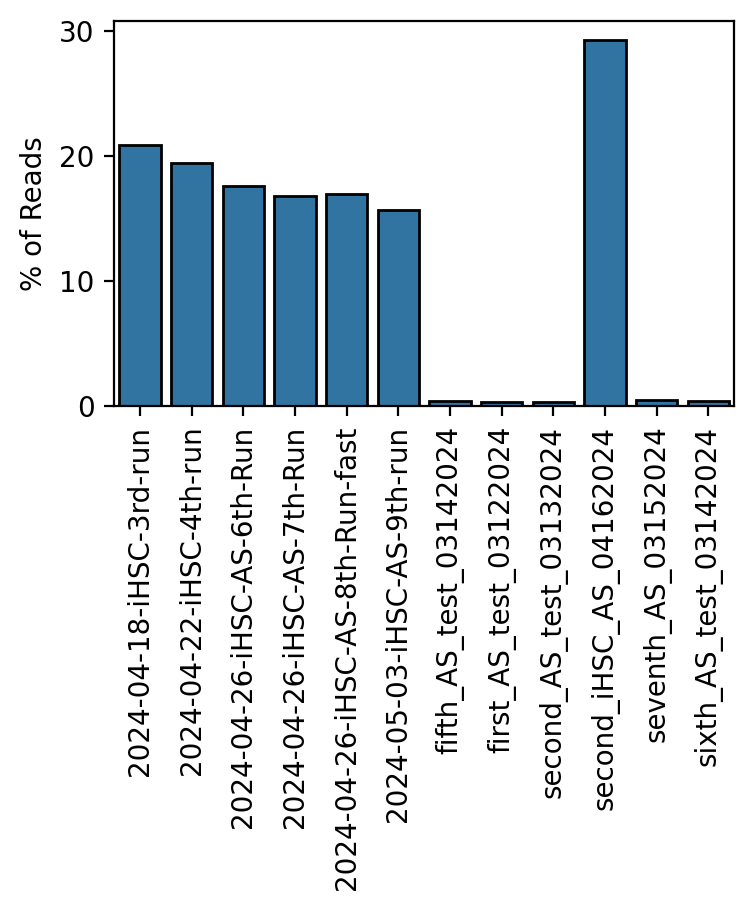

In [4]:
pdf = gx.copy()
pdf = pdf.sort_values(by='run')

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4, 2.5

sns.barplot(data=pdf, 
            x='run',
            y='is_stop_recieving_percent',
            ec='k')

plt.ylabel("% of Reads")
plt.xlabel("")
plt.gca().tick_params(axis='x', rotation=90)

In [5]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
df['decision'].unique()